In [35]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy.misc import imread
from scipy import ndimage

from skimage import img_as_float
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import filters
from skimage import feature
from skimage.util import random_noise

# ADDED BY ME
import imageio
from skimage import filters
#from filters import filter.edges



First-order edge detection methods, such as Prewitt and Sobel, are defined as convolution kernels. 
1. Convolve the image twice (once for horizontal edges, and another for vertical ones)
2. Compute the magnitude (or add the absolute values) of these results to yield the final image. 

In practice, this image might also then be thresholded to produce a binary image where white pixels would represent edges. 

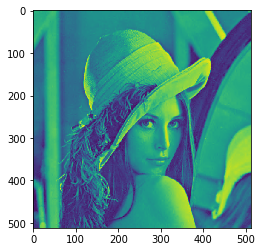

Type:<class 'numpy.ndarray'>
DType: uint8
Shape: (512, 512)
Size: 262144
Max: 190
Min: 0
Contrast: 190
Mean (Brightness): 90.28
STDD: 40.73



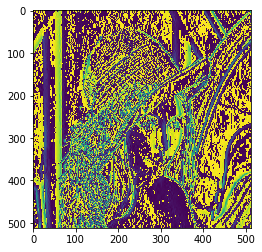

Type:<class 'numpy.ndarray'>
DType: uint8
Shape: (512, 512)
Size: 262144
Max: 255
Min: 0
Contrast: 255
Mean (Brightness): 111.95
STDD: 110.31



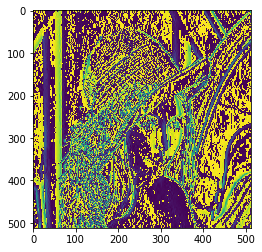

Type:<class 'numpy.ndarray'>
DType: uint8
Shape: (512, 512)
Size: 262144
Max: 255
Min: 0
Contrast: 255
Mean (Brightness): 111.95
STDD: 110.31



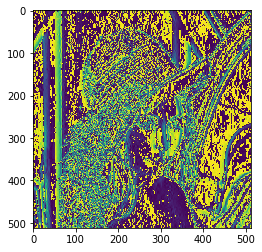

Type:<class 'numpy.ndarray'>
DType: uint8
Shape: (512, 512)
Size: 262144
Max: 254
Min: 0
Contrast: 254
Mean (Brightness): 112.91
STDD: 101.93



In [36]:
# Load and display the lenna image. Extract the edges in the image using the Prewitt operator from ndimage module 
#and see the results.

# https://www.tutorialspoint.com/dip/index.htm
# https://www.tutorialspoint.com/dip/prewitt_operator.htm

# 0 horizontal
# 1 vertical

# https://www.researchgate.net/figure/Edges-of-Lena-image-512-512-using-Sobel-edge-detector-a-without-prior-smoothing_fig6_308695863


def printImage( img ):
    
    plt.imshow( img )
    plt.show()

def printGrayImage( img ):
    
    plt.imshow( img, cmap=plt.cm.gray )
    plt.show()

def imageInfo( img ):
    
    print( "Type:" +    str( type( img ) ) )
    print( "DType: " +  str( img.dtype  )   )
    print( "Shape: " +  str( img.shape  )   )
    print( "Size: "  +  str( img.size   )   )
    print( "Max: "   +  str( img.max()  )   )
    print( "Min: "   +  str( img.min()  )   )
    print( "Contrast: " + str( img.max() - img.min() ) )
    print( "Mean (Brightness): "  +  str( round( img.mean(), 2 ) ) )   
    print( "STDD: "  +  str( round( img.std(), 2 )  )   )
    print()
    
img_to_read_path = "imgs/lenna.tif"
img = imageio.imread( img_to_read_path )
# https://pypi.org/project/imageio/

img = np.array( img )
printImage( img )
imageInfo( img )


# Find the vertical edges of an image using the Prewitt transform
prewitt_result = ndimage.prewitt( img )
printImage( prewitt_result )
imageInfo( prewitt_result )

# Find the vertical edges of an image using the Sobel transform.
sobel_result = ndimage.prewitt( img )
printImage( sobel_result )
imageInfo( sobel_result )

def imageAddition( img, img_or_int ):
    
    return img + img_or_int;

edges_result = imageAddition( prewitt_result, sobel_result )
printImage( edges_result )
imageInfo( edges_result )

# Compare this result using the skimage module




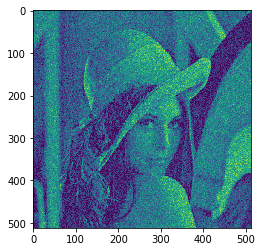

Type:<class 'numpy.ndarray'>
DType: float64
Shape: (512, 512)
Size: 262144
Max: 1.0
Min: 0.0
Contrast: 1.0
Mean (Brightness): 0.36
STDD: 0.19



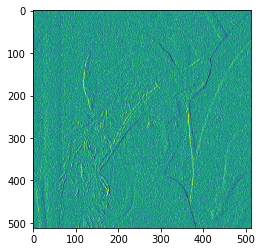

Type:<class 'numpy.ndarray'>
DType: float64
Shape: (512, 512)
Size: 262144
Max: 1.748853685854296
Min: -2.0828878110073803
Contrast: 3.8317414968616763
Mean (Brightness): 0.0
STDD: 0.29



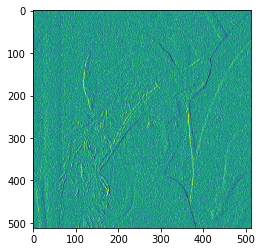

Type:<class 'numpy.ndarray'>
DType: float64
Shape: (512, 512)
Size: 262144
Max: 1.748853685854296
Min: -2.0828878110073803
Contrast: 3.8317414968616763
Mean (Brightness): 0.0
STDD: 0.29



In [40]:
# Add gaussian noise to the lenna image and extract its edges using the same operator.
# How did the Prewitt edge detector perform in the presence of noise?
import skimage

img_with_gaussian_noise = skimage.util.random_noise(img, mode='gaussian', seed=None, clip=True)
printImage( img_with_gaussian_noise )
imageInfo( img_with_gaussian_noise )

# Find the vertical edges of an image using the Prewitt transform
prewitt_result = ndimage.prewitt( img_with_gaussian_noise )
printImage( prewitt_result )
imageInfo( prewitt_result )

# Find the vertical edges of an image using the Sobel transform.
sobel_result = ndimage.prewitt( img_with_gaussian_noise )
printImage( sobel_result )
imageInfo( sobel_result )



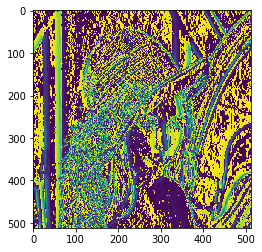

Type:<class 'numpy.ndarray'>
DType: uint8
Shape: (512, 512)
Size: 262144
Max: 255
Min: 0
Contrast: 255
Mean (Brightness): 112.7174072265625
STDD: 106.8423439422471



In [30]:
# Extract the edges from the lenna image using the Sobel edge detector.
# Extract the edges from the test image with Gaussian noise using the Sobel edge detector.
# How does the Sobel operator compare with the Prewitt operator with and without noise?
    
sobel_result = ndimage.sobel( img )
printImage( sobel_result )
imageInfo( sobel_result )

# Sobel



# noisy and sobel


In [ ]:
# Display the horizontal and vertical convolution results from the Sobel operator with the lenna image



# Sobel


In [ ]:
# Display the thresholded (binarized) lenna image after the sobel operator.



# Sobel



Different operators compute different finite-difference approximations of the gradient. For example, the Scharr filter results in a less rotational variance than the Sobel filter that is in turn better than the Prewitt filter. The difference between the Prewitt and Sobel filters and the Scharr filter is illustrated below with an image that is the discretization of a rotation- invariant continuous function. The discrepancy between the Prewitt and Sobel filters, and the Scharr filter is stronger for regions of the image where the direction of the gradient is close to diagonal, and for regions with high spatial frequencies. For the example image the differences between the filter results are very small and the filter results are visually almost indistinguishable.

Run the following code: 

In [ ]:
# http://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py

x, y = np.ogrid[:100, :100]
# Rotation-invariant image with different spatial frequencies
img = np.exp(1j * np.hypot(x, y)**1.3 / 20.).real

edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

diff_scharr_prewitt = edge_scharr - edge_prewitt
diff_scharr_sobel = edge_scharr - edge_sobel
max_diff = np.max(np.maximum(diff_scharr_prewitt, diff_scharr_sobel))

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_scharr, cmap=plt.cm.gray)
ax[1].set_title('Scharr Edge Detection')

ax[2].imshow(diff_scharr_prewitt, cmap=plt.cm.gray, vmax=max_diff)
ax[2].set_title('Scharr - Prewitt')

ax[3].imshow(diff_scharr_sobel, cmap=plt.cm.gray, vmax=max_diff)
ax[3].set_title('Scharr - Sobel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Similar options are available with the edge function when the Roberts operator is used. Extract the edges from the 
# original image using the Roberts operator.

# Apply the Roberts operator to a noisy image. Compare the Roberts operator with the Sobel and Prewitt operators.




In [ ]:
# Extract the edges from the original image using the LoG edge detector. Experiment different values for sigma. 
# Apply the LoG edge detector to the noisy image.



In [ ]:
# Write a Python program to obtain the difference of the Laplacian of Gaussian (LoG) and apply it to the lenna image.
# The pseudo code for the program will be as follows:
# (a) Read the image
# (b) Apply LoG assuming a standard deviation of 0.9 and s tore the image as im1
# (c) Apply LoG assuming a standard deviation of 1.3 and store the image as im2
# (d) Find the difference b etween the two images and store the resulting image.



In [ ]:
# Extract the edges from the original image using the Canny edge detector. Experiment different values for sigma. 



In [ ]:
# The Canny edge detection algorithm is composed of 5 steps:
# 1. Noise reduction;
# 2. Gradient calculation;
# 3. Non-maximum suppression;
# 4. Double threshold;
# 5. Edge Tracking by Hysteresis.

# Implement your own canny edge detector

from scipy import ndimage
from scipy.ndimage.filters import convolve

from scipy import misc
import numpy as np

   
def gaussian_kernel(size = 3, sigma=1):

    
def sobel_filters(img):

    

def non_max_suppression(img, D=1):

         

def threshold(img,lowThreshold=0.05, highThreshold=0.15, weak_pixel=75, strong_pixel=255):



def hysteresis(img,weak_pixel=75, strong_pixel=255):


def detect(img): 
    mask = gaussian_kernel()
    img_smoothed = convolve(img, mask, mode='constant',cval=0.0)
    gradientMat, thetaMat = sobel_filters(img_smoothed)
    nonMaxImg = non_max_suppression(gradientMat, thetaMat)
    thresholdImg = threshold(nonMaxImg)
    img_final = hysteresis(thresholdImg)
    
    return img_final


img = img_as_float(imread('imgs\lenna.tif'))
edges = detect(img)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(edges,cmap='gray')
plt.show()